# Лабораторна робота 2
## Варіант 6
$$\large \left\{\begin{matrix}\dot{x}=-2x-y\\ \dot{y}=-9x-3y\end{matrix}\right.$$


In [22]:
from matplotlib import pyplot as plt
from sympy.solvers import solve
import numpy as np
from sympy import*

### Задача 1
1) Знайти, під яким кутом фазові траєкторії перетинають пряму $y=x$.

In [11]:
from sympy import atan ,pi
from sympy.abc import x, y 

P = lambda y,x : -2*x - y
Q = lambda x,y : -9*x - 3*y
A = Q(x,x)/P(x,x)
alpha = float((atan(A)  * 360) / (2 * pi))
print(f'alpha = {alpha:.4} degrees')

alpha = 75.96 degrees


2) Для фазових траєкторій, що примикають до початку координат, знайти кут, під яким вони примикають до початку т.(0,0).

Точка (0,0) є ізольованою спеціальною точкою.

3) Зобразити фазові траекторії.

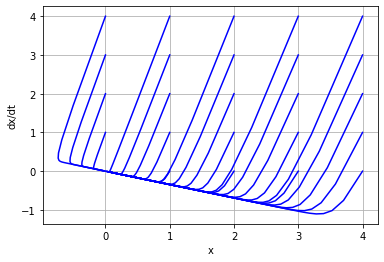

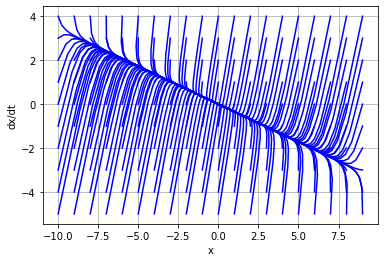

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

'''@args:
    y - state variable
    t - time
    b, c - args of ode
'''
def ode(y, t, b=9, c=3):
        theta, omega = y
        dydt = [-2*omega-theta, -b*omega - c*theta]
        return dydt
        

'''
Calculate ode

@args:
    args - arguments of ODE
    y0 - The initial state of y
    yd0 - The initial state of derivative y
    ts - the duration of the simulation
    nt - Number steps if simulation (=ts*deltat)
'''
def calcODE(args, y0, dy0, ts = 10, nt = 101):
    y0 = [y0, dy0]
    t = np.linspace(0, ts, nt)
    sol = odeint(ode, y0, t, args)
    return sol

'''
Drawing Phase portrait of ODE in function ode()

@args:
    args - arguments of ODE
    deltaX - step  x
    deltaDX - step  derivative x
    startX - start value of x
    stopX - stop value of x
    startDX - start value of derivative x
    stopDX - stop value of derivative x
    ts - the duration of the simulation
    nt - Number steps if simulation (=ts*deltat)
'''    
def drawPhasePortrait(args, deltaX = 1, deltaDX = 1, startX = 0,  stopX = 5, startDX = 0, stopDX = 5, ts = 10, nt = 101):
    for y0 in range(startX, stopX, deltaX):
            for dy0 in range(startDX, stopDX, deltaDX):
                sol = calcODE(args, y0, dy0, ts, nt)
                plt.plot(sol[:, 0], sol[:, 1], 'b')
    plt.xlabel('x')
    plt.ylabel('dx/dt')
    plt.grid()
    plt.show()
    
      
b=9
c=3
args=(b, c)
drawPhasePortrait(args)
drawPhasePortrait(args, 1, 1, -10, 10, -5, 5, ts = 30, nt = 301)

## Задача 2
$$\large \left\{\begin{matrix}\dot{x}=y^2-xy+12\\ \dot{y}=x^2-xy-28\end{matrix}\right.$$

1) Знайти всі положення рівноваги системи диференціальних рівнянь, для кожного з положень рівноваги записати відповідну систему першого наближення.

In [17]:
from sympy.abc import x,y
fx = y*y - x*y + 12
fy = x*x - x*y - 28
h = solve(fx,y,dict = False)
dots = []
for i in range(len(h)):
    print(f'y={h[i]}')
    g = solve(fy.subs(y,h[i]),x)
    print(f'x: {g}')
    for j in range(len(g)):
        dots.append((int(g[j]),int(h[i].subs(x,g[j]))))
print("Положення рівноваги {}" .format(dots))

y=x/2 - sqrt(x**2 - 48)/2
x: [7]
y=x/2 + sqrt(x**2 - 48)/2
x: [-7]
Положення рівноваги [(7, 3), (-7, -3)]


2) Зобразити на фазовій площині напрямки векторного поля у точках $(m,n)$, де $m = {-6 , -5, \ldots , 6}, \enspace  n = {-6 , -5, \ldots , 6}$

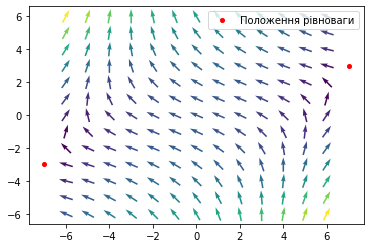

In [23]:
np.seterr(divide='ignore', invalid='ignore')

def fun(P):
    return [P[0],(P[0]**3-P[1]**3-7)/(P[0]-P[1]-1)]

x = np.linspace(-6,6,13)
y = np.linspace(-6,6,13)

x,y = np.meshgrid(x,y)
DX1 = y*y - x*y + 12
DY1 =  x*x - x*y - 28
M = (np.hypot(DX1, DY1))
DX1 /= M
DY1 /= M
plt.quiver(x, y, DY1, DX1, M, pivot='mid', cmap=plt.cm.viridis)
plt.plot([dot[0] for dot in dots],[dot[1] for dot in dots],'ro', label = 'Положення рівноваги', markersize=4)
plt.legend()
plt.show()

3) Дослідити на стійкість усі положення рівноваги.

In [32]:
from copy import copy
from numpy import linalg as LA
from sympy.abc import x,y

mtr = np.array([[diff(fx,x),diff(fx,y)],[diff(fy,x),diff(fy,y)]])
mtrix = []
a = np.ones(mtr.shape)
a = a.astype('int32')
for dot in dots:
    reps = [(y, dot[0]), (x, dot[1])]
    for i in range(mtr.shape[0]):
        for j in range(mtr.shape[1]):
            a[i,j] = mtr[i,j].subs(reversed(reps))
    mtrix.append(copy(a))
    



for mt in mtrix:
    w, v = LA.eig(mt)
    if all(w.real <0):
        print(f'Матриця:\n{mt}\nСтійка')
    else:
        print(f'Матриця:\n{mt}\nНестійка')


Матриця:
[[-7 11]
 [-1 -3]]
Стійка
Матриця:
[[  7 -11]
 [  1   3]]
Нестійка


4) Зобразити на фазовій площині фазові траєкторії в околах положень рівноваги.

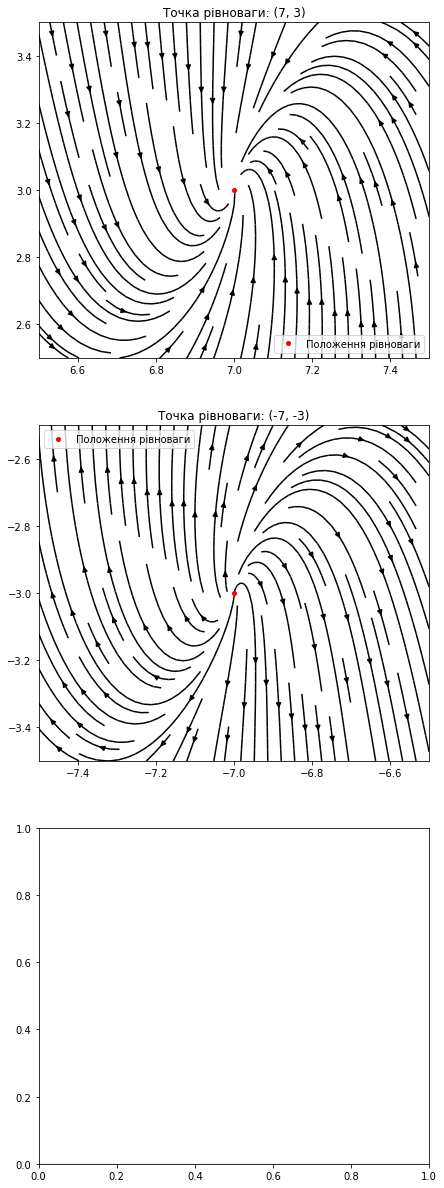

In [33]:
fig, axs = plt.subplots(3, 1, figsize=(7,21))

def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
axes()

for ind, dot in enumerate(dots):
    l = 0.5
    x = np.linspace(dot[0]-l, dot[0]+l, 1000)
    y = np.linspace(dot[1]-l, dot[1]+l, 1000)
    x, y = np.meshgrid(x, y)
    U = y*y - x*y + 12
    V = x*x- x*y -28
    axs[ind].streamplot(x, y, U, V, color = "k")
    axs[ind].plot(dot[0],dot[1],'ro', label = 'Положення рівноваги', markersize=4)
    axs[ind].legend()
    axs[ind].set_xlim(dot[0]-l, dot[0]+l)
    axs[ind].set_ylim(dot[1]-l, dot[1]+l)
    axs[ind].set_title(f'Точка рівноваги: {dot}')